# Proyecto 2 - Entrega 1
## Modelo de regresion lineal.

Nelson Escalante - 22046

### PARTE 1: Analisis exploratorio de los datos.

#### Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Analisis

In [4]:
#Direccion del archivo
path = "data/train.csv"

houses = pd.read_csv(path)
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houses.shape

(1460, 81)

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Se puede observar que contamos con mas variables categoricas que numericas. Ademas, las siguientes columnas contienen datos nulos:
- LotFrontage
- Alley
- MasVnrType
- MasVnrArea
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Electrical
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

In [8]:
#Variables numericas
numeric = [
    'Id',
#    'MSSubClass', <- Es una variable que utiliza numeros para representar las categorias
    'LotFrontage',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGr',
    'Fireplaces',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold',
    'SalePrice'
]

Al tener una lista de variables numericas podemos utilizarlas para realizar analisis detallados de los datos.

In [9]:
#Categorias unicas en variables categoricas
houses.select_dtypes(include=['object']).nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

En base a los datos recopilados en el analisis, y gracias tambien al archivo 'data_description.txt' que venia junto a los datos, podemos identificar las variables clave en nuestro dataset.

In [10]:
#Variables clave
key_var = [
    'MSSubClass',
    'MSZoning',
    'LotArea',
    'Street',
    'Alley',
    'LandContour',
    'Utilities',
    'LotConfig',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'HouseStyle',
    'OverallQual',
    'OverallCond',
    'Exterior1st',
    'Exterior2nd',
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BstmCond',
    'TotalBsmtSF',
    'Heating',
    'CentralAir',
    'GrLivArea',
    'FullBath',
    'Bedroom',
    'Kitchen',
    'TotRmsAbvGrd',
    'Functional',
    'Fireplaces',
    'GarageType',
    'GarageArea',
    'GarageQual',
    'PoolArea',
    'MiscFeature'
]

In [11]:
key_var.__len__()

35

Estas seran las variables sobre las cuales realizaremos un analisis mas a fondo y buscaremos relaciones para realizar predicciones de los precios de las casas. Estas variables fueron seleccionadas debido a la relevancia que tienen sobre estos precios, por lo que se espera que sean utiles en los pasos siguientes.

Ademas de el analisis de las variables, es importante analizar el comportamiento de la variable objetivo de nuestra investigacion: SalePrice

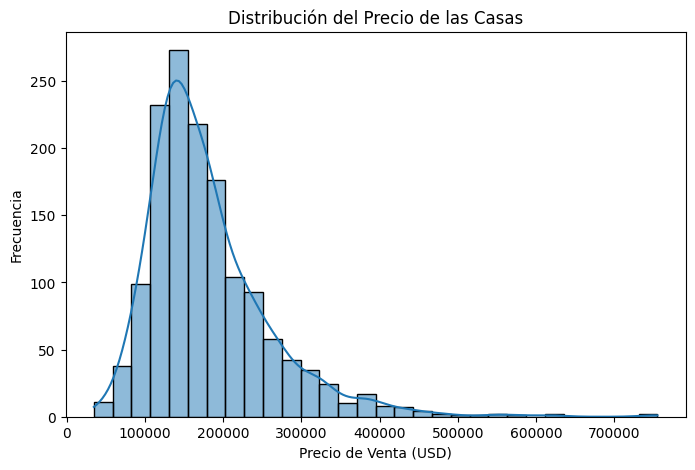

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(houses['SalePrice'], bins=30, kde=True)
plt.title("Distribución del Precio de las Casas")
plt.xlabel("Precio de Venta (USD)")
plt.ylabel("Frecuencia")
plt.show()

Gracias a la grafica podemos observar que la distribucion de del precio es una distribucion normal con sesgo positivo, es decir, hacia la derecha. En base a esto podemos asumir que hay muchas casas con precios relativamente bajos, pero tambien hay casas con precios muy altos que elevan la media de los precios. 

Hay que tomar en cuenta este comportamiento, ya que puede afectar en algunos modelos de regresion.